In [1]:
import pandas as pd
import mysql.connector
import seaborn as sb
import matplotlib.pyplot as plt
import datetime 
from wordcloud import WordCloud, ImageColorGenerator


%matplotlib inline
mydb = mysql.connector.connect(
  host="localhost",
  user="root",
  password="",
  database='scraping'
)

In [2]:
df = pd.read_sql("SELECT * FROM QUESTIONS",mydb)

In [3]:
print(f'Duplicated rows: {sum(df.duplicated())}')

Duplicated rows: 1


In [4]:
df.drop_duplicates(inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 365382 entries, 0 to 365382
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   question_id   365382 non-null  int64 
 1   tags          365378 non-null  object
 2   view_count    365382 non-null  int64 
 3   answer_count  365382 non-null  int64 
 4   score         365382 non-null  int64 
 5   created       365382 non-null  int64 
 6   is_answered   365382 non-null  bool  
dtypes: bool(1), int64(5), object(1)
memory usage: 19.9+ MB


In [6]:
df.created = pd.to_datetime(df.created,unit='s')
df.created = df.created.dt.date
df.tags = df.tags.astype(str)

<AxesSubplot:xlabel='is_answered', ylabel='count'>

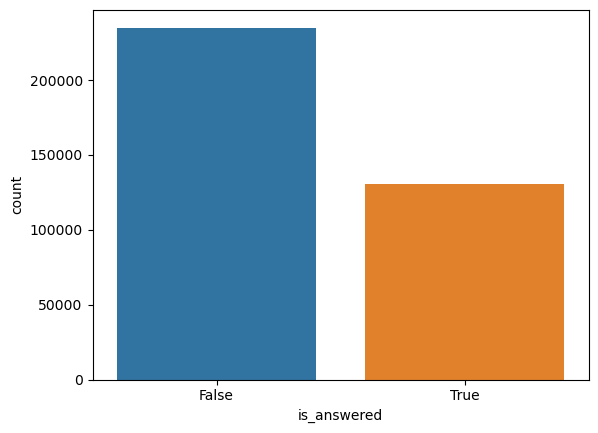

In [7]:
sb.countplot(data=df, x='is_answered')

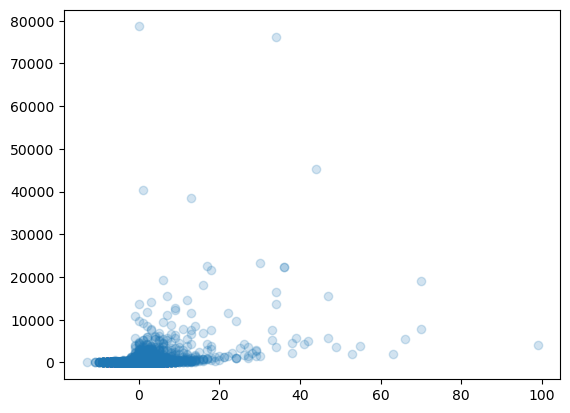

In [8]:
plt.scatter(data=df,x='score', y='view_count',alpha=0.2)

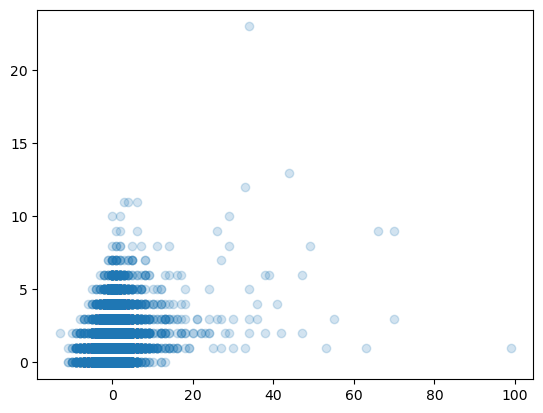

In [9]:
plt.scatter(data=df,x='score', y='answer_count',alpha=0.2)

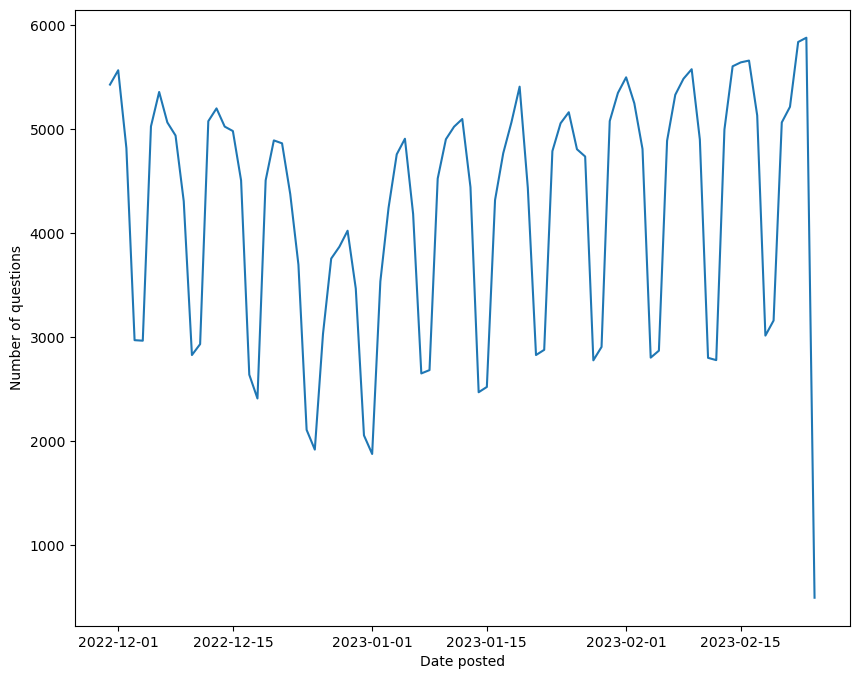

In [11]:
date_count = df.groupby(['created']).size()
date_count = date_count.reset_index(name='count')
plt.figure(figsize=(10,8))
sb.lineplot(data=date_count,x='created',y='count')
plt.xlabel('Date posted')
plt.ylabel('Number of questions');

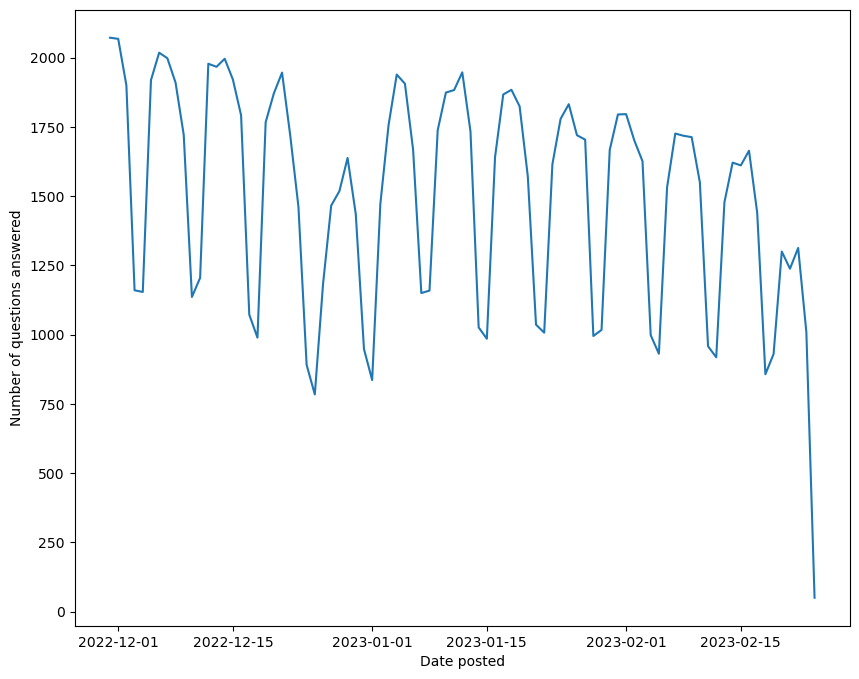

In [12]:
date_count = df.query("is_answered == True").groupby(['created']).size()
date_count = date_count.reset_index(name='count')
plt.figure(figsize=(10,8))
sb.lineplot(data=date_count,x='created',y='count')
plt.xlabel('Date posted')
plt.ylabel('Number of questions answered');

In [ ]:
df.created.min()

datetime.date(2022, 11, 30)

In [ ]:
df.created.max()

datetime.date(2023, 2, 22)

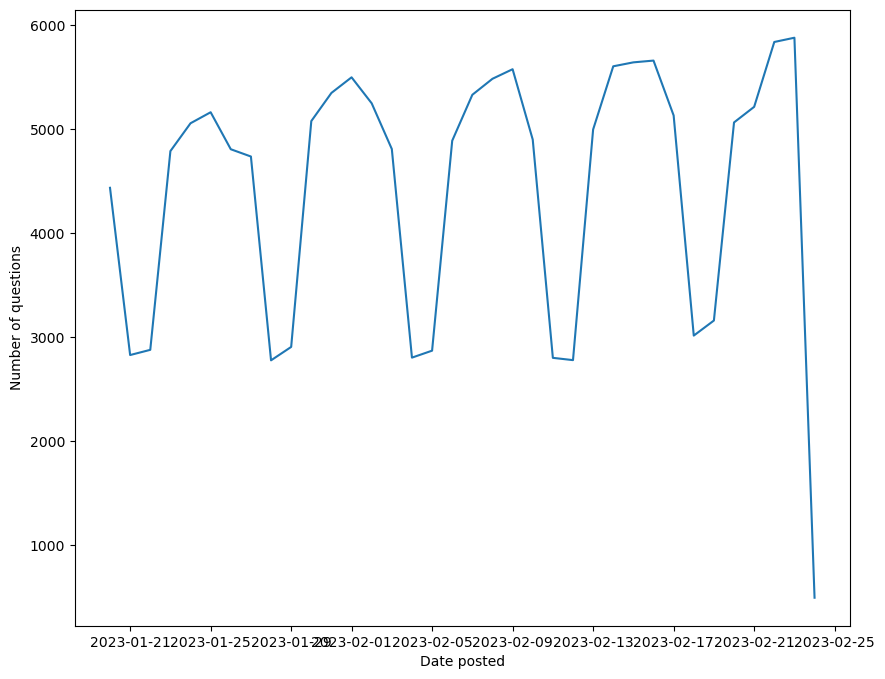

In [13]:
date_count = df[df['created'] >= datetime.date(2023,1,20)].groupby(['created']).size()
date_count = date_count.reset_index(name='count')
plt.figure(figsize=(10,8))
sb.lineplot(data=date_count,x='created',y='count')
plt.xlabel('Date posted')
plt.ylabel('Number of questions');

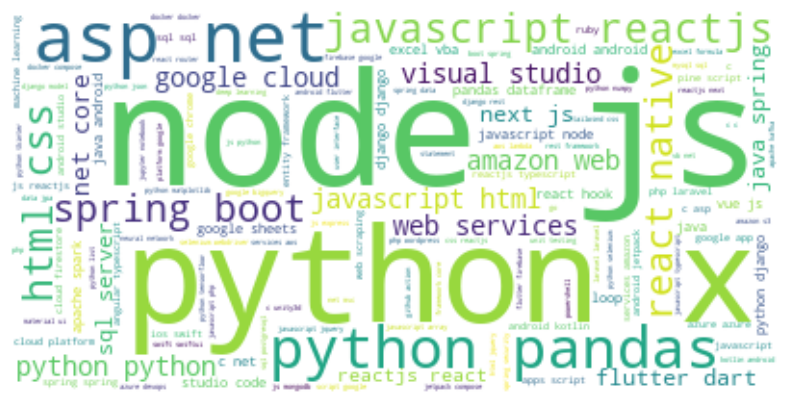

In [14]:
tags = " ".join(" ".join(tag.split("|")) for tag in df.tags)

wordcloud = WordCloud(background_color="white").generate_from_text(text=tags)
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [26]:
df[['tag_1','tag_2','tag_3','tag_4','tag_5']] = df.tags.str.split('|',expand=True)
melted_df = pd.melt(df,id_vars=['question_id','created','view_count','answer_count','score','is_answered'],value_vars=['tag_1','tag_2','tag_3','tag_4','tag_5'],value_name='tag')

<AxesSubplot:xlabel='is_answered', ylabel='count'>

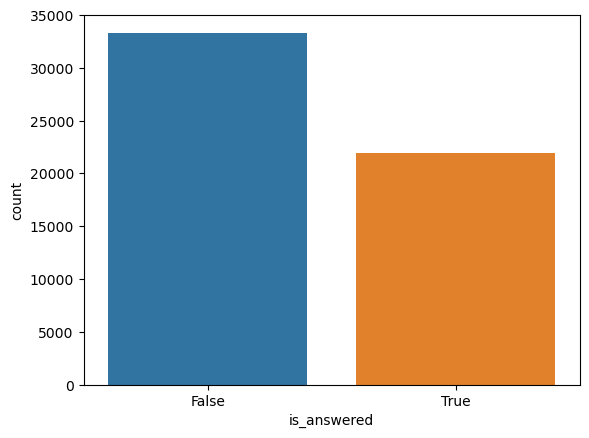

In [27]:
python_df = melted_df.query("tag=='python'")
sb.countplot(data=python_df,x='is_answered')